In [235]:
naslib_path = '../zero_cost/NASLib'
benchmark = 'zc_nasbench201'

In [236]:
from zc_combine.utils.naslib_utils import load_search_space, parse_scores


search_space = load_search_space(naslib_path, benchmark)
dfs = parse_scores(search_space)

In [4]:
from zc_combine.operations import filter_by_range

#filt = filter_by_range(dfs['cifar10'], 'nwot', 800, 850)
#filt = filter_by_range(dfs['cifar10'], 'nwot', 799, 799.5)
filt = filter_by_range(dfs['cifar10'], 'nwot', 810, 825)

In [131]:
import numpy as np

ids = np.array(filt['net'].str.strip('()').str.split(', ').to_list())

In [132]:
np.unique(ids, return_counts=True)

(array(['0', '1', '2', '3', '4'], dtype='<U1'),
 array([1422, 1217, 4844, 4880, 1215]))

In [133]:
np.unique(np.sum(ids == '0', axis=1), return_counts=True)

(array([0, 1, 2]), array([1074,  956,  233]))

In [89]:
ids = np.array(dfs['cifar10']['net'].str.strip('()').str.split(', ').to_list())
np.unique(ids, return_counts=True)

(array(['0', '1', '2', '3', '4'], dtype='<U1'),
 array([18750, 18750, 18750, 18750, 18750]))

In [94]:
ids.shape

(544, 6)

In [632]:
dfs.keys()

dict_keys(['class_scene', 'class_object', 'autoencoder', 'normal', 'jigsaw', 'room_layout', 'segmentsemantic', 'ninapro', 'svhn', 'scifar100'])

In [352]:
only_2_4 = dfs['cifar10']
#only_2_4 = filter_by_ops(dfs['cifar10'], {2, 3, 4})
#only_2_4 = only_2_4[only_2_4['net'].str.count(',') == 5]


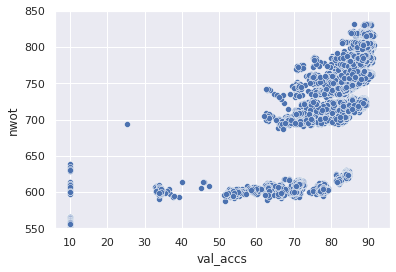

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.scatterplot(data=only_2_4, x='val_accs', y='nwot')
#plt.xlim(70, 91)
plt.ylim(550, 850)
plt.show()

In [457]:
from zc_combine.operations import parse_ops_nb301, get_nb301_cell, count_ops

only_2_4 = dfs['cifar10']
darts_ops = parse_ops_nb301(only_2_4)

In [132]:
import numpy as np
from zc_combine.operations import parse_ops_nb101, count_ops

only_len_6 = dfs['cifar10'][dfs['cifar10']['net'].str.len() == 168]
nb101_ops, nb101_edges = parse_ops_nb101(only_len_6, return_edges=True)
counts = count_ops(nb101_ops, 4) + count_ops(nb101_ops, 3)

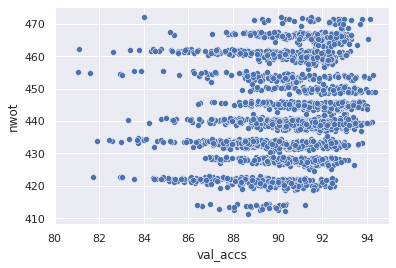

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
prox = 'nwot'

def plot_clouds(df, counts, vmin=0, vmax=7):
    for c in range(vmin, vmax):
        sns.scatterplot(data=df[counts == c], x='val_accs', y=prox)

plot_clouds(only_len_6, counts, vmin=3, vmax=4)
plt.xlim(80, 95)
#plt.ylim(430, 437)
plt.show()

In [230]:
from zc_combine.operations import filter_by_range
#some_nets = filter_by_range(dfs['cifar10'], 'nwot', 420, 425).sort_values('val_accs')
some_nets = filter_by_range(only_len_6[counts == 3], 'nwot', 465, 468).sort_values('val_accs')

In [231]:
some_ops, some_edges = parse_ops_nb101(some_nets, return_edges=True)
np.unique(count_ops(some_edges, 1), return_counts=True)

(array([8, 9]), array([ 34, 170]))

In [232]:
edg = pd.DataFrame(np.array(some_edges).sum(axis=0), columns=['edges'])

In [233]:
edg

,edges
0,0
1,204
2,116
3,109
4,67
5,73
6,43
7,0
8,0
9,143


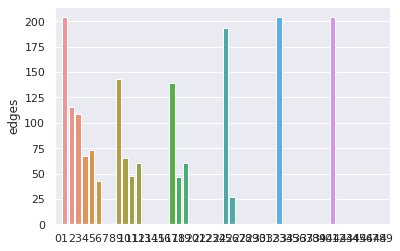

In [234]:
sns.barplot(x=edg.index, y=edg['edges'])
plt.show()

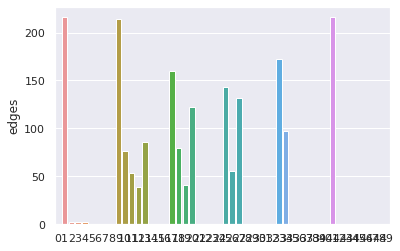

In [229]:
sns.barplot(x=edg.index, y=edg['edges'])
plt.show()

In [177]:
pd.Series(np.array(some_edges).sum(axis=0)).sort_values(ascending=False)


1     216
41    216
9     214
33    172
17    160
25    143
27    132
20    122
34     97
13     86
18     80
10     76
26     56
11     53
19     41
12     39
2       2
4       2
3       2
45      0
38      0
35      0
36      0
37      0
48      0
39      0
40      0
47      0
46      0
43      0
44      0
42      0
0       0
32      0
16      0
5       0
6       0
7       0
8       0
14      0
15      0
21      0
31      0
22      0
23      0
24      0
28      0
29      0
30      0
49      0
dtype: int64

In [174]:
pd.Series(np.array(some_edges).sum(axis=0)).sort_values(ascending=False)

33    320
41    320
1     320
25    284
9     276
17    252
10    143
18    128
19    115
2     113
12    104
11     97
26     90
3      65
5      57
4      51
6      22
32      0
44      0
45      0
46      0
42      0
47      0
40      0
39      0
38      0
48      0
37      0
36      0
35      0
34      0
43      0
0       0
31      0
20      0
7       0
8       0
13      0
14      0
15      0
16      0
21      0
30      0
22      0
23      0
24      0
27      0
28      0
29      0
49      0
dtype: int64

In [458]:
from zc_combine.operations import count_ops

cell = get_nb301_cell(darts_ops, i=0)
counts = count_ops(cell, 4) + count_ops(cell, 3) + count_ops(cell, 2) + count_ops(cell, 5)

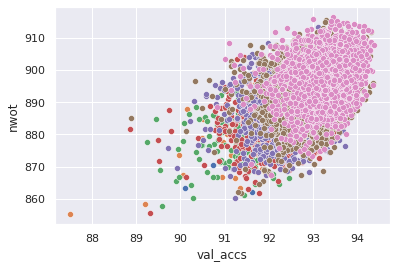

In [459]:
prox = 'nwot'

sns.scatterplot(data=only_2_4[counts == 0], x='val_accs', y=prox)
sns.scatterplot(data=only_2_4[counts == 1], x='val_accs', y=prox)
sns.scatterplot(data=only_2_4[counts == 2], x='val_accs', y=prox)
sns.scatterplot(data=only_2_4[counts == 3], x='val_accs', y=prox)
sns.scatterplot(data=only_2_4[counts == 4], x='val_accs', y=prox)
sns.scatterplot(data=only_2_4[counts == 5], x='val_accs', y=prox)
sns.scatterplot(data=only_2_4[counts == 6], x='val_accs', y=prox)
#plt.xlim(70, 91)
#plt.ylim(650, 850)
plt.show()

In [239]:
from zc_combine.operations import count_ops, parse_ops_nb201

nb201 = parse_ops_nb201(dfs['cifar10'])
counts = count_ops(nb201, 3) + count_ops(nb201, 2)

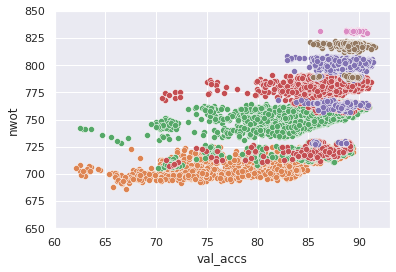

In [253]:
plot_clouds(dfs['cifar10'], counts, vmax=7)
plt.xlim(60, 93)
plt.ylim(650, 850)
plt.show()

In [460]:
upper_sum = only_2_4[counts == 6].sort_values('val_accs')

upper_cell = get_nb301_cell(parse_ops_nb301(upper_sum), i=0)
upper_counts = count_ops(upper_cell, 3) + count_ops(upper_cell, 4)

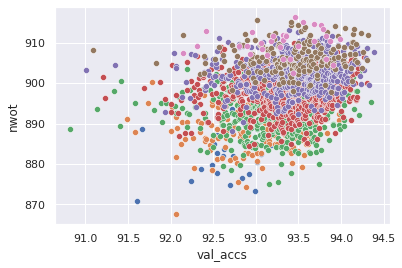

In [461]:
def plot_clouds(df, counts, vmin=0, vmax=7):
    for c in range(vmin, vmax):
        sns.scatterplot(data=df[counts == c], x='val_accs', y=prox)

plot_clouds(upper_sum, upper_counts, vmax=7)
#plt.xlim(70, 91)
#plt.ylim(650, 850)
plt.show()

In [80]:
only_2_4[counts == 4].sort_values('val_accs')

,net,val_accs,fisher,flops,grad_norm,grasp,jacov,l2_norm,nwot,params,plain,snip,zen,epe_nas,synflow,random,rank
3099,"(0, 2, 3, 0, 2, 2)",21.402269,0.875970,2090.396160,18.866207,0.344181,-32.209345,868.717041,468.793911,10.142852,-0.003340,133.831589,36.063438,471.410415,67.634750,2366,4093.5
3288,"(0, 2, 2, 0, 3, 2)",21.402269,0.951230,2090.396160,19.132591,0.034042,-32.239395,869.510986,467.504224,10.142852,0.010201,117.945633,36.004063,381.359567,67.656612,3254,4093.5
2499,"(2, 2, 1, 0, 2, 2)",22.347731,1.538654,723.282432,41.010582,-0.232040,-32.270727,849.698608,488.532665,3.155076,0.023757,285.117523,74.671494,416.213497,78.670374,934,4081.0
3520,"(2, 3, 2, 0, 2, 0)",22.417397,0.757522,1864.133120,21.808004,-0.185108,-32.253730,848.965881,488.704788,8.594564,-0.004553,147.617340,75.405273,268.902766,67.667443,3821,4080.0
2874,"(0, 2, 2, 0, 2, 2)",22.875200,1.090491,748.218880,22.123343,-0.087593,-32.296024,869.464050,468.791424,3.327108,0.010060,138.352829,36.033096,511.188950,67.691081,3120,4075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,"(3, 3, 2, 1, 1, 2)",44.760151,1.037828,3031.067136,21.530375,-0.081501,-32.017463,949.575928,488.657171,14.207876,0.052751,210.251297,107.959213,514.503226,107.544350,3381,20.0
2942,"(3, 1, 2, 2, 3, 1)",44.765129,1.510148,3232.393728,29.711950,-2.158253,-32.020516,948.191223,489.252416,15.584132,0.121825,267.557831,107.859398,395.589833,92.041627,3546,19.0
3559,"(3, 1, 2, 3, 2, 1)",44.849724,1.578784,3031.067136,31.949432,0.200359,-32.019280,948.073853,489.664066,14.207876,0.159940,292.614197,108.133942,625.391207,85.592388,2607,14.0
2531,"(1, 3, 2, 1, 3, 3)",44.874603,1.133782,4625.590784,24.463614,-0.456736,-32.011977,1068.654419,489.820178,22.745732,0.110195,253.912125,128.019608,504.625486,98.162004,3261,13.0


In [561]:
o2 = filter_by_range(only_2_4, 'nwot', 440, 450)

In [562]:
o2

,net,val_accs,fisher,flops,grad_norm,grasp,jacov,l2_norm,nwot,params,plain,snip,zen,epe_nas,synflow,random,rank
3,"(4, 3, 3, 1, 3, 2)",41.973526,1.886227,906.493184,34.928699,8.012875,-32.011908,490.587555,448.190014,5.083780,0.050013,292.181854,79.654526,663.741288,97.784467,1141,2642.5
14,"(3, 4, 1, 4, 1, 1)",42.938892,1.528585,971.044096,25.209860,3.067698,-32.018572,488.091705,447.230115,8.136196,0.129238,209.999954,77.941269,779.277489,100.644408,2768,1982.0
18,"(3, 3, 1, 3, 2, 4)",41.127586,1.108668,402.156800,28.355051,10.714993,-32.014754,401.838684,440.384146,3.275012,0.073392,180.214523,73.582848,818.091248,93.306503,2384,3050.0
42,"(3, 1, 3, 4, 1, 3)",41.351513,1.183533,520.185472,26.485701,6.577244,-32.016213,389.364441,446.583721,2.208644,0.076727,173.124512,71.292984,701.394748,93.599922,2244,2968.0
47,"(4, 3, 3, 3, 1, 2)",41.650082,1.916415,878.107904,37.702835,17.970688,-32.011109,490.482910,447.131995,5.083780,0.057141,300.341980,79.296013,826.036899,97.015350,536,2819.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,"(4, 3, 3, 1, 1, 3)",41.734673,1.666572,910.714496,34.201790,11.786476,-32.013041,454.760437,449.178716,3.562116,0.048980,260.177917,76.224304,744.784183,97.501617,2857,2766.5
3206,"(3, 3, 1, 1, 4, 1)",42.277069,0.728927,434.567808,17.063375,2.172314,-32.017639,354.128632,441.784706,1.749124,0.070682,105.823166,69.321190,820.588389,92.952293,555,2453.5
3208,"(3, 1, 3, 4, 2, 1)",40.679737,1.135290,758.265088,23.514416,5.293198,-32.013138,435.651123,448.193823,5.484164,0.102328,165.731842,75.695984,642.957622,96.571225,2720,3157.0
3227,"(3, 4, 3, 1, 2, 2)",43.486267,0.962742,1131.391488,20.379360,3.079027,-32.014325,528.296692,444.403044,12.440324,0.077770,176.179123,83.252701,551.009042,100.118491,752,1579.0


In [499]:
s = filter_by_range(only_2_4, 'nwot', 520, 560)

In [500]:
s

,net,val_accs,fisher,flops,grad_norm,grasp,jacov,l2_norm,nwot,params,plain,snip,zen,epe_nas,synflow,random,rank
26,"(1, 1, 2, 2, 1, 4)",45.431927,0.858958,30339.320320,11.028534,-0.150351,-32.015425,509.357574,529.143182,13.747076,0.041939,104.692574,82.407829,643.579984,101.539680,1495,341.5
39,"(2, 1, 2, 4, 1, 3)",46.297771,1.420511,34025.835008,18.494337,1.353255,-32.012431,679.735474,526.199206,30.826372,0.004350,222.261932,90.892517,415.923003,108.301620,2750,61.0
48,"(2, 2, 1, 2, 3, 3)",44.008759,1.743050,67341.191680,22.652912,1.640316,-32.009559,738.631409,541.754761,32.860036,0.003444,289.862213,95.280212,566.757348,109.700768,2711,1213.5
59,"(2, 2, 1, 4, 3, 1)",45.645901,2.002544,34027.407872,26.313873,1.958296,-32.014966,706.584717,527.120339,32.596868,0.070421,317.720734,91.996696,791.442337,109.596367,897,252.5
87,"(1, 2, 1, 2, 2, 3)",44.192875,0.977913,58209.421824,13.681297,0.018176,-32.010602,597.086975,539.131504,21.533060,0.049123,157.100067,88.137016,646.358071,104.298641,3248,1090.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,"(2, 1, 1, 1, 2, 3)",45.596138,0.588587,20604.822784,9.497854,-0.051247,-32.028950,491.707977,526.452242,6.870404,0.067862,87.015091,82.807693,584.282770,101.846490,63,270.0
3179,"(2, 2, 1, 3, 2, 3)",45.934517,1.076619,34096.613888,17.676020,0.894210,-32.009403,691.708130,528.866411,25.582980,0.093495,205.388397,93.518028,601.120050,108.333673,3082,145.5
3199,"(1, 2, 2, 1, 3, 1)",45.919586,1.029583,26040.640768,13.516673,0.116011,-32.014713,526.153381,526.967887,9.968516,0.075348,128.710831,83.108673,680.000148,103.221067,290,152.0
3220,"(1, 2, 2, 2, 3, 3)",45.899681,1.358876,58272.057856,17.913292,1.229820,-32.009884,692.901123,537.081491,30.646660,0.004441,211.088684,92.389610,820.291788,106.947928,1161,161.5


In [344]:
s = filter_by_range(only_2_4, 'nwot', 550, 650)


In [347]:
np.unique(s['net'].str.count('2') + s['net'].str.count('3'), return_counts=True)

(array([0, 1, 2, 3]), array([662, 394, 196,  32]))

In [180]:
s = only_2_4.sort_values('nwot').reset_index()

In [184]:
s['net'].str.count('4')

0     6
1     5
2     5
3     5
4     5
     ..
59    1
60    1
61    1
62    1
63    0
Name: net, Length: 64, dtype: int64

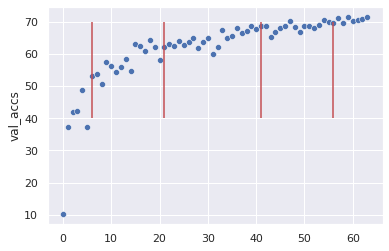

In [192]:
sns.scatterplot(data=s, x=s.index, y='val_accs')
plt.vlines(6,40, 70, color='r')
plt.vlines(21,40, 70, color='r')
plt.vlines(41,40, 70, color='r')
plt.vlines(56,40, 70, color='r')
plt.show()